<a href="https://colab.research.google.com/github/peiyuhuang-uca/GIS_programming_Project_Peiyu/blob/main/GIS_Project_Peiyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Flood Analysis Using Sentinel-1 SAR Data and Affected Areas Assessment Based on MODIS Land Cover Data**
##**Peiyu Huang, M1Risks, Dec. 9**

# **Abstract**
**This study analyzed the Valencia flood event (October-November 2024) by integrating Sentinel-1 SAR and MODIS Land Cover data. The primary objective was to map flood extent and assess the affected cropland and urban areas. The methodology involved processing Sentinel-1 SAR images (VH polarization) to generate a flood mask using a difference ratio approach. This mask was then overlaid with MODIS Land Cover data (500m resolution) to quantify the impact. Main results show an estimated 8155 hectares of total flooded area, with 4604 hectares of identified affected cropland. A significant limitation arose from the spatial resolution mismatch between the SAR (10m) and MODIS (500m) data, impacting the accuracy of affected urban area assessment.**

# **Introduction**

### **1. Natural Hazard: Flood:**  

Floods are Europe’s most common and costly natural disaster, ranging from river overflows to sudden flash floods. Driven by climate change, their frequency and intensity are rising because warmer air holds more moisture.

**Scientific Relevance**


*   **Hydrological Modeling:** Defines surface permeability and runoff coefficients (e.g., urban vs. forest) crucial for predicting discharge.



*  **Flow Dynamics:** Surface roughness parameters calibrate flood speed and extent.





**Environmental Relevance**


*   **Vulnerability Mapping:** Identifies at-risk ecosystems and agricultural zones.
*   **Impact Assessment:** Monitors post-flood habitat destruction and vegetation recovery.



###**2. Sentinel-1 SAR data and its applications for detecting environmental changes.**
Sentinel-1 SAR is a satellite mission by the European Space Agency using **Synthetic Aperture Radar (SAR)**, which captures high-resolution images of Earth day or night, in any weather due to microwave (long wavelength, penetrating the clouds). Therefore, it is not **sun-dependent** nor **weather-dependent**.

🌍 **Key Applications:**

* **Flood detection:** Maps water extent even under clouds.

* **Land deformation:** Monitors earthquakes, landslides, and subsidence.

* **Deforestation:** Tracks forest loss and land use changes.

* **Agriculture:** Assesses soil moisture and crop conditions.


###**3. MODIS Land Cover Data and its applications for detecting environmental changes.**

The MODIS Land Cover Type product (MCD12Q1) provides annual global maps of land use derived from NASA’s Terra and Aqua satellites. It classifies the Earth's surface into categories like **forests**, **agriculture**, and **urban areas** at **500-meter resolution**. This data is crucial for monitoring environmental changes, climate modeling, and resource management.

🌍 **Key Applications:**



*   **Deforestation:** Tracks forest loss and habitat fragmentation globally.
*   **Urbanization:** Monitors city expansion into natural landscapes.


*   **Agriculture:** Maps crop expansion and shifting cultivation trends.
*   **Disaster Recovery:** Assesses vegetation regrowth following fires or floods.

### **Bibliographic references:**
[1] Carreño Conde, F., & De Mata Muñoz, M. (2019). Flood Monitoring Based on the Study of Sentinel-1 SAR Images: The Ebro River Case Study. Water, 11(12), 2454. https://doi.org/10.3390/w11122454 **(Analysis showed that better results for flood mapping can be obtained by the VH (Vertical Horizontal) polarization)**

[2] Sy, B., Bah, F., & Dao, H. (2024). Flood Extent Delineation and Exposure Assessment in Senegal Using the Google Earth Engine: The 2022 Event. Water, 16(15), 2201. https://doi.org/10.3390/w16152201 **(Explicitly contrasts its high-resolution (10m) findings with broader, coarser analyses often derived from MODIS (500m))**


‌[3] Step-by-Step: Recommended Practice: Flood Mapping and Damage Assessment Using Sentinel-1 SAR Data in Google Earth Engine | UN-SPIDER Knowledge Portal. (n.d.). Www.un-Spider.org. Retrieved September 19, 2021, from https://www.un-spider.org/advisory-support/recommended-practices/recommended-practice-google-earth-engine-flood-mapping/step-by-step






#**Materials and Methods**

### **1. Study area and methods description**


**1.1 Research geographic area**

**Valencia, Spain**: In late October 2024, a "DANA" storm system dumped a year's worth of rain in hours on Valencia, Spain. This catastrophic flash flooding killed over 220 people and decimated regional infrastructure.

**1.2 Temporal period**

Dates of the Valencia Floods (2024)

* **Start Date:** October 29, 2024

Details: Torrential rains began, nearly **500 mm** in just **8 hours**.

* **Peak Impact:** October 29 – October 30, 2024

* **Duration/Aftermath:** Late October – Mid-November 2024

**Research Duration:**

**Before Floods: 2024-09-01 to 2024-10-15**

**After Floods: 2024-10-15 to 2024-11-20**

**1.3 Tools and libraries**


*   **Google Earth Engine (geemap package)**
*   Codes: Python

**1.4 Applied methods and codes**

Based on methods and codes of the step-by-step practice, this project produced a **flood extent map** using **Sentinel-1 SAR images**, as well as displays information about **cropland and population centers** affected from **MODIS Land Cover Type** in order to address the totality of major concerns that floods cause.
(Source: Step-By-Step: Recommended Practice: Flood Mapping and Damage Assessment Using Sentinel-1 SAR Data in Google Earth Engine | UN-SPIDER Knowledge Portal, n.d.)

###**2. Sentinel-1 SAR data**
**Acquisition type**
* **Sensor Type:** C-Band Synthetic Aperture Radar.
* **Orbit:** Near-polar, sun-synchronous orbit at ~693 km altitude.
* **Revisit Time:** 6 days to 12 days.
* **Pass Direction:** Ascending (South to North) and Descending (North to South) orbits.

* **Polarization:**
  * **VV (Vertical-Vertical):** Best for surface scattering (e.g., detecting calm water).
  * **VH (Vertical-Horizontal):** Best for volume scattering (e.g., **flooded vegetation structure**).



### **3. MODIS Land Cover Type Yearly Global 500m (MCD12Q1)**

* **Dataset:** MCD12Q1 (Derived from Terra & Aqua satellites).

* **Resolution:** 500 m spatial resolution; Annual temporal update.

* **Classes:** 17 types, including **Water Bodies, Urban, and Croplands**.

* **Function:** Used as a baseline to mask permanent water and identify vulnerable land use types.




#**Results**

##**Part 1: Image visualization about floods based on Sentinel-1 SAR data**

### **Figure 1: RGB composite from Sentinel-1 SAR images acquired several weeks or months prior to the Valencia Flood event in Spain.**

In [34]:
# Composite image (RGB) Before the event

import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='global-standard-477508-q3')

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gamma, f, chi2
import IPython.display as disp
%matplotlib inline


# Import the Folium library.
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

geoJSON = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              -0.5168999089524391,
              39.53404626453434
            ],
            [
              -0.5168999089524391,
              39.14723168850253
            ],
            [
              -0.22645108602009145,
              39.14723168850253
            ],
            [
              -0.22645108602009145,
              39.53404626453434
            ],
            [
              -0.5168999089524391,
              39.53404626453434
            ]
          ]
        ],
        "type": "Polygon"
      }
    }
  ]
}

coords = geoJSON['features'][0]['geometry']['coordinates']
aoi = ee.Geometry.Polygon(coords)

# Extract data from Sentinel 1 SAR (COPERNICUS)
flood_before = ee.Image(ee.ImageCollection('COPERNICUS/S1_GRD')
                       .filterBounds(aoi)
                       .filterDate(ee.Date('2024-9-01'), ee.Date('2024-10-15'))
                       .first()
                       .clip(aoi))
flood_after = ee.Image(ee.ImageCollection('COPERNICUS/S1_GRD')
                       .filterBounds(aoi)
                       .filterDate(ee.Date('2024-10-15'), ee.Date('2024-11-20'))
                       .first()
                       .clip(aoi))

# vh_before = flood_before.select('VH').getThumbURL({'min': -20, 'max': 0})
# disp.Image(url=vh_before, width=500)

location = aoi.centroid().coordinates().getInfo()[::-1]

# Make an RGB color composite image (VV,VH,VV/VH).
rgb_before = ee.Image.rgb(flood_before.select('VV'),
                   flood_before.select('VH'),
                   flood_before.select('VV').divide(flood_before.select('VH')))

# Create the map object.
m_before = folium.Map(location=location, zoom_start=12)

# Add the S1 rgb composite to the map object.
m_before.add_ee_layer(rgb_before, {'min': [-20, -20, 0], 'max': [0, 0, 2]}, 'FFA')

# Add a layer control panel to the map.
m_before.add_child(folium.LayerControl())

# Display the map.
display(m_before)

 **From the Figure 1 above which shows the RGB composite from images acquired several weeks or months prior to the Valencia flood, we can find that there is a lake (indeed, Albufera Natural Park, wetlands) in the middle of our Area of Interest (AOI). Because in Sentinel-1 SAR imagery, brightness is determined by backscatter intensity:**

* **Water (Dark):** Smooth surfaces cause specular reflection, bouncing radar pulses away from the sensor, resulting in very low signal return.

* **Urban (Bright):** Buildings act as "corner reflectors," causing double-bounce scattering that directs signals straight back to the sensor (high signal).

* **Cropland (Lighter/Grey):** Rough soil and vegetation cause diffuse scattering, reflecting moderate energy back.

### **Figure 2: RGB composite from Sentinel-1 SAR images after the Valencia Flood event in Spain.**

In [35]:

# Composite image (RGB) after the event
location = aoi.centroid().coordinates().getInfo()[::-1]

# Make an RGB color composite image (VV,VH,VV/VH).
rgb_after = ee.Image.rgb(flood_after.select('VV'),
                   flood_after.select('VH'),
                   flood_after.select('VV').divide(flood_after.select('VH')))

# Create the map object.
m_after = folium.Map(location=location, zoom_start=12)

# Add the S1 rgb composite to the map object.
m_after.add_ee_layer(rgb_after, {'min': [-20, -20, 0], 'max': [0, 0, 2]}, 'FFA')

# Add a layer control panel to the map.
m_after.add_child(folium.LayerControl())

# Display the map.
display(m_after)

### **Figure 3: Comparison of RGB composite from Sentinel-1 SAR images before and after the Valencia Flood event in Spain.**

In [36]:

## Compare rgb picture before and after the Valencia floods event
import folium
from folium.plugins import DualMap

# 'location', 'rgb_before', and 'rgb_after' are assumed to be defined from previous cells.

# Create a DualMap object. This creates two internal Folium maps: dual_map.m1 (left) and dual_map.m2 (right).
dual_map = DualMap(location=location, zoom_start=12)

# Add the 'before' Earth Engine layer to the left map (dual_map.m1).
dual_map.m1.add_ee_layer(rgb_before, {'min': [-20, -20, 0], 'max': [0, 0, 2]}, 'FFA Before')
# Add a layer control for the left map (optional, but good for clarity).
dual_map.m1.add_child(folium.LayerControl())

# Add the 'after' Earth Engine layer to the right map (dual_map.m2).
dual_map.m2.add_ee_layer(rgb_after, {'min': [-20, -20, 0], 'max': [0, 0, 2]}, 'FFA After')
# Add a layer control for the right map (optional, but good for clarity).
dual_map.m2.add_child(folium.LayerControl())

# Display the dual map.
display(dual_map)

**From the figure above, we can find that compared with before, there are more darker areas in the AOI (image on the right) after the floods which means these parts have a lower backscatter intensity thus reducing the signal back to the sensor and usually water takes this role. Therefore, the changes of RGB composite images have shown that there are more flooded areas in the AOI after the event, especially near or on the south side of the Albufera Natural Park (darker area).**

##**Part 2: Detect urban/cropland areas affected by floods based on MODIS Land Cover data**

In [37]:
# Ensure geemap and ipyleaflet are cleanly reinstalled
!pip uninstall -y geemap ipyleaflet
!pip install geemap


import geemap


Found existing installation: geemap 0.36.6
Uninstalling geemap-0.36.6:
  Successfully uninstalled geemap-0.36.6
Found existing installation: ipyleaflet 0.20.0
Uninstalling ipyleaflet-0.20.0:
  Successfully uninstalled ipyleaflet-0.20.0
  Using cached geemap-0.36.6-py3-none-any.whl.metadata (14 kB)
  Using cached ipyleaflet-0.20.0-py3-none-any.whl.metadata (5.3 kB)
Using cached geemap-0.36.6-py3-none-any.whl (2.5 MB)
Using cached ipyleaflet-0.20.0-py3-none-any.whl (31 kB)


### **Step 1: Area of Interest and Sentinel-1 SAR parameters.**

**Area of Interest:**


*   Use **built-in** example polygon (Valencia, Spain).
*   Allowing user to manually **draw an AOI** on the map below.

**Sentinel-1 SAR parameters:**


*   **Polarization = "VH"**, commonly used for **flooding** due to complex flooded areas (probably with buildings, crop lands and other vegetations, different from the lake in **backscatter intensity**).
*   **Pass direction = 'DESCENDING'**.
*   **Threshold for floods:** reference from the flooding research. (Source: Step-By-Step: Recommended Practice: Flood Mapping and Damage Assessment Using Sentinel-1 SAR Data in Google Earth Engine | UN-SPIDER Knowledge Portal, n.d.).





In [38]:

# ====== Spatial Extent (AOI) ======
# Method A: Use built-in example polygon (Valencia, Spain)
geometry = ee.Geometry.Polygon(coords)

# Method B: You can also manually draw an AOI on the map below; the next cell will automatically read m.user_roi (if not drawn, it falls back to the above geometry)

# ====== Time Range ======
before_start = '2024-09-01'
before_end   = '2024-10-15'
after_start  = '2024-10-15'
after_end    = '2024-11-20'

# ====== SAR Parameters ======
polarization = 'VH'          # 'VH' or 'VV' (VH is commonly used for flooding)
pass_direction = 'DESCENDING' # or 'ASCENDING'
difference_threshold = 1.25   # Difference threshold (after/before)
smoothing_radius = 50         # Speckle smoothing (meters)

print('Parameters have been set.')



m = geemap.Map()
m.add_basemap('Esri.WorldImagery') # Corrected basemap name
m.add_layer_control()

# Open drawing tool (default: polygon)
m.add_draw_control() # Removed problematic draw_polygon argument

# Display the built-in AOI first to facilitate positioning
m.addLayer(ee.FeatureCollection(geometry), {}, 'Built-in AOI', False)
m.centerObject(geometry, 8)
m



Parameters have been set.


Map(center=[39.3405508286476, -0.37167549748618833], controls=(WidgetControl(options=['position', 'transparent…

### **Step 2: Generating flood masks based on the Sentinel-1 SAR data.**

### **Mechanism of detecting flooded areas**


* **Why SAR?** It works day/night and through clouds, ideal for floods.

* **How it works:** Compares radar signal changes ("before" vs. "after" flood). Open water makes the signal dark. **Crucially, flooded vegetation/urban areas can make the signal brighter (due to "double-bounce" reflection), especially with VH polarization.** A "difference ratio" highlights these changes (**brighter means larger pixel values**) , and a threshold identifies flooded pixels.

* **Refinements**: Permanent water and steep slopes are excluded to ensure accuracy.

In [39]:
# Read the ROI drawn by the user on the map (if not present, falls back to the built-in geometry)
drawn = None
try:
    # geemap stores user-drawn geometries in m.user_roi or m.user_rois
    if m.user_roi is not None:
        drawn = m.user_roi
    elif m.user_rois is not None and len(m.user_rois) > 0:
        drawn = ee.FeatureCollection(m.user_rois).geometry()
except Exception:
    pass

aoi_geom = drawn if drawn is not None else geometry
aoi = ee.FeatureCollection(aoi_geom)

# Sentinel-1 GRD Collection
collection = (ee.ImageCollection('COPERNICUS/S1_GRD')
              .filter(ee.Filter.eq('instrumentMode', 'IW')) #deep dig
              .filter(ee.Filter.listContains('transmitterReceiverPolarisation', polarization))
              .filter(ee.Filter.eq('orbitProperties_pass', pass_direction))
              .filter(ee.Filter.eq('resolution_meters', 10))
              .filterBounds(aoi)
              .select(polarization))

before_collection = collection.filterDate(before_start, before_end)
after_collection  = collection.filterDate(after_start,  after_end)

def dates(ic):
    rng = ic.reduceColumns(ee.Reducer.minMax(), ["system:time_start"])
    return (ee.String('from ')
            .cat(ee.Date(rng.get('min')).format('YYYY-MM-dd'))
            .cat(' to ')
            .cat(ee.Date(rng.get('max')).format('YYYY-MM-dd')))

# Print collection information (small getInfo calls, not heavy)
print('Number of "Before" images:', before_collection.size().getInfo(),
      '| Time:', dates(before_collection).getInfo())
print('Number of "After" images:', after_collection.size().getInfo(),
      '| Time:', dates(after_collection).getInfo())

# Mosaic + Clip
before = before_collection.mosaic().clip(aoi)
after  = after_collection.mosaic().clip(aoi)

# Speckle Smoothing (focal_mean)
before_f = before.focal_mean(smoothing_radius, 'circle', 'meters')
after_f  = after.focal_mean(smoothing_radius, 'circle', 'meters')

# Difference (ratio) and Threshold
difference = after_f.divide(before_f)
flood_binary = difference.gt(difference_threshold)

# Remove permanent water bodies (JRC seasonality >= 10 months)
swater = ee.Image('JRC/GSW1_0/GlobalSurfaceWater').select('seasonality')
swater_mask = swater.gte(10)
flood_no_perm = flood_binary.where(swater_mask, 0)
flooded = flood_no_perm.updateMask(flood_no_perm)

# 8-neighbor connectivity filtering (denoising)
connections = flooded.connectedPixelCount()
flooded = flooded.updateMask(connections.gte(8))

# Slope < 5° filtering (HydroSHEDS DEM)
DEM = ee.Image('WWF/HydroSHEDS/03VFDEM')
slope = ee.Algorithms.Terrain(DEM).select('slope')
flooded = flooded.updateMask(slope.lt(5))

print('Flood mask has been generated.')

Number of "Before" images: 16 | Time: from 2024-09-02 to 2024-10-13
Number of "After" images: 12 | Time: from 2024-10-20 to 2024-11-18
Flood mask has been generated.


### **Step 3: Affected areas estimation due to floods (application with MODIS Land Cover Type data).**

* **Why MODIS?** Provides classifications of land use (e.g., cropland, urban).

* **How it works:** The SAR-derived flood map is **overlaid** onto the MODIS land cover map. By masking, **only the portions of specific land cover types (like cropland or urban areas) that are within the flooded region are identified.**

* **Quantification:** The area of these intersected regions is then calculated, providing specific figures for affected cropland and urban areas, which is vital for impact assessment.


In [40]:
# ---- Land Use (MODIS MCD12Q1, LC_Type1, 500m) ----
LC = (ee.ImageCollection('MODIS/006/MCD12Q1')
      .filterDate('2014-01-01', after_end)
      .sort('system:index', False)   # Get the latest year
      .select('LC_Type1')
      .first()
      .clip(aoi))

# cropland: 12 (cropland) or 14 (cropland/natural vegetation mosaic)
cropmask = LC.eq(12).Or(LC.eq(14))
cropland = LC.updateMask(cropmask)

# urban: 13 (urban)
urbanmask = LC.eq(13)
urban = LC.updateMask(urbanmask)

# Overlay flood with MODIS projection
modis_proj = LC.projection()
flooded_modis = flooded.reproject(crs=modis_proj)

cropland_affected = flooded_modis.updateMask(cropland)
urban_affected = urban.mask(flooded_modis).updateMask(urban)

# Area Statistics (hectares)
# Total flooded area
flood_pixelarea = flooded.select(polarization).multiply(ee.Image.pixelArea())
flood_stats = flood_pixelarea.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=aoi_geom,
    scale=10,
    bestEffort=True
)
flood_area_ha = ee.Number(flood_stats.get(polarization, 0)).divide(10000).round() # Added default value 0

# Flooded cropland area (note band name is LC_Type1)
crop_pixelarea = cropland_affected.multiply(ee.Image.pixelArea())
crop_stats = crop_pixelarea.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=aoi_geom,
    scale=500,
    maxPixels=1e9,
    bestEffort=True
)
crop_area_ha = ee.Number(crop_stats.get(polarization, 0)).divide(10000).round() # Added default value 0

# Flooded urban area
urban_pixelarea = urban_affected.multiply(ee.Image.pixelArea())
urban_stats = urban_pixelarea.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=aoi_geom,
    scale=500,
    bestEffort=True
)
urban_area_ha = ee.Number(urban_stats.get('LC_Type1', 0)).divide(10000).round() # Added default value 0

# Print results
print('==== Statistics Results (Automatic) ====')
print('Period (After):', after_start, '—', after_end)
print('Estimated total flooded area:', flood_area_ha.getInfo(), 'hectares')
# Extract MODIS LC year
modis_year = ee.String(LC.get('system:index')).slice(0, 4).getInfo()
print(f'Estimated affected cropland area: {crop_area_ha.getInfo()} hectares (MODIS {modis_year}, 500m)')
print(f'Estimated affected urban area: {urban_area_ha.getInfo()} hectares (MODIS {modis_year}, 500m)')

==== Statistics Results (Automatic) ====
Period (After): 2024-10-15 — 2024-11-20
Estimated total flooded area: 8155 hectares
Estimated affected cropland area: 4604 hectares (MODIS 2020, 500m)
Estimated affected urban area: 0 hectares (MODIS 2020, 500m)


**Based on the results from flood detection:**

* **Period (After): 2024-10-15 - 2024-11-20**

* **Estimated total flooded area: 8155 hectares**

* **Estimated affected cropland area: 4604 hectares (MODIS 2020, 500m)**

* **Estimated affected urban area: 0 hectares (MODIS 2020, 500m)**

### **Step 4: Maps of potentially flooded, affected cropland and urban areas.**

In [41]:
# Recreate/refresh map
m2 = geemap.Map()
m2.add_basemap('HYBRID')
m2.centerObject(aoi_geom, 8)

# Visualization parameters
sar_vis = {'min': -25, 'max': 0}
diff_vis = {'min': 0, 'max': 2}
flood_vis = {'palette': ['0000FF']}  # Blue
lc_vis = {
    'min': 1.0, 'max': 17.0,
    'palette': [
        '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
        'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
        '69fff8', 'f9ffa4', '1c0dff'
    ]
}
cropland_vis = {'min': 0, 'max': 14.0, 'palette': ['30b21c']}
urban_vis = {'min': 0, 'max': 13.0, 'palette': ['808080']}

# Layers
m2.addLayer(before_f, sar_vis, 'Before Flood', False)
m2.addLayer(after_f,  sar_vis, 'After Flood', True)
m2.addLayer(difference, diff_vis, 'Difference (after/before)', False)
m2.addLayer(flooded, flood_vis, 'Flooded areas', True)
m2.addLayer(LC, lc_vis, 'MODIS Land Cover', False)
m2.addLayer(cropland, cropland_vis, 'Cropland', False)
m2.addLayer(cropland_affected, cropland_vis, 'Affected Cropland', True)
m2.addLayer(urban, urban_vis, 'Urban', False)
m2.addLayer(urban_affected, urban_vis, 'Affected Urban', True)

# Categorical legend (Potentially flooded/Affected cropland/Affected urban)
legend_dict = {
    'potentially flooded areas': '0000FF',
    'affected cropland': '30b21c',
    'affected urban': '808080'
}

m2

Map(center=[39.3405508286476, -0.37167549748618833], controls=(WidgetControl(options=['position', 'transparent…

In [42]:
import folium
from folium.plugins import DualMap

# 'location', 'rgb_after', and 'after_f' are assumed to be defined from previous cells.
# 'sar_vis' (visualization parameters for single-band SAR) is also defined in previous cells.

# Create a DualMap object, centered at the same location.
dual_map_compare = DualMap(location=location, zoom_start=12)

# Add the 'after' RGB composite image to the left map (dual_map_compare.m1).
dual_map_compare.m1.add_ee_layer(rgb_after, {'min': [-20, -20, 0], 'max': [0, 0, 2]}, 'After Flood RGB')
dual_map_compare.m1.add_child(folium.LayerControl())

# Add the 'After Flood' single-band SAR image (after_f) to the right map (dual_map_compare.m2).
dual_map_compare.m2.add_ee_layer(flooded, flood_vis, 'Flooded areas (m2 layer)')
dual_map_compare.m2.add_child(folium.LayerControl())

# Display the dual map.
display(dual_map_compare)

### **Step 5: Draw Barplots to compare the affected areas of urban/cropland with the flood region.**

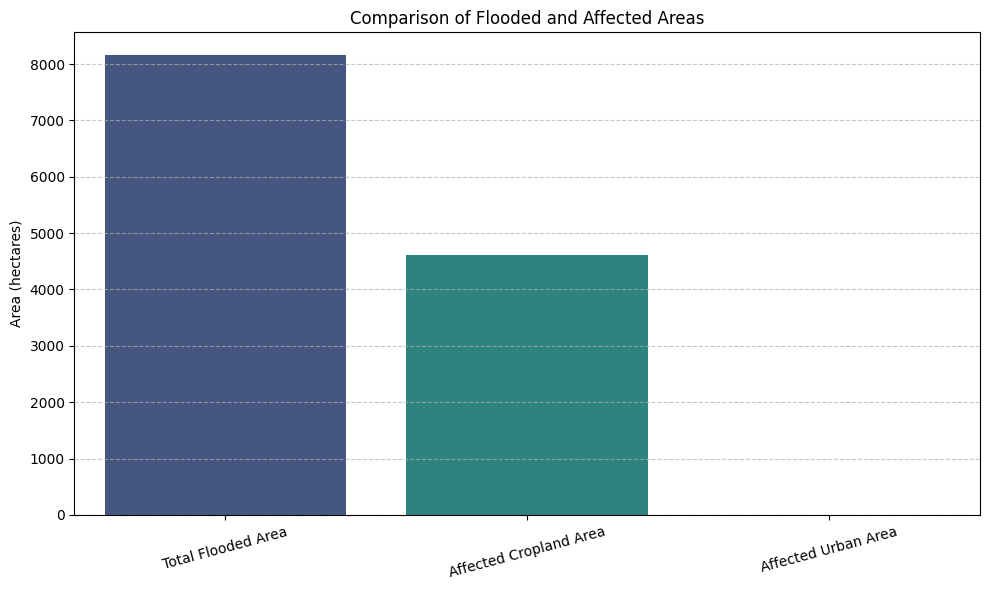

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Retrieve the numerical values of the areas from Earth Engine objects
total_flood_area = flood_area_ha.getInfo()
affected_cropland_area = crop_area_ha.getInfo()
affected_urban_area = urban_area_ha.getInfo()

# Create a dictionary for the data
data = {
    'Area Type': [
        'Total Flooded Area',
        'Affected Cropland Area',
        'Affected Urban Area'
    ],
    'Area (hectares)': [
        total_flood_area,
        affected_cropland_area,
        affected_urban_area
    ]
}

# Create a pandas DataFrame
df_areas = pd.DataFrame(data)

# Generate the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Area Type', y='Area (hectares)', data=df_areas, palette='viridis')
plt.title('Comparison of Flooded and Affected Areas')
plt.ylabel('Area (hectares)')
plt.xlabel('') # Remove x-axis label as 'Area Type' is self-explanatory
plt.xticks(rotation=15) # Slightly rotate labels if they overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Based on the detection results from Sentinel-1 SAR and MODIS Land Cover Type data, we can find that the Valencia flood has affected at least 4604 hectares, but there are some limitations in detecting affected urban areas due to blank specific data about these areas.**

# **Discussion**

### **1. Flood events detection from Sentinel-1 SAR data**

After comparison of the RGB image from Sentinel-1 SAR before and after floods, significant changes came from much darker areas where the backscatter intensity decreased. This can be explained by flood affection, especially formation of open water areas due to flooding. While other land cover type areas, including urban and cropland areas are not sensitive to Sentinel-1 SAR detection because the changes in these areas cannot be clearly identified.

**Advantages:**
* **All-Weather Capability:** C-band microwaves penetrate clouds, rain, and smoke, capturing data during storms when optical satellites (like Landsat/Sentinel-2) are blind.
* **High Spatial Resolution:** Provides 10m resolution, capable of detecting smaller floods than coarser climate satellites.

* **Clear Water Identification:** high contrast (dark/black pixels) against the rougher, brighter land.

**Disadvantages:**

*  **Urban Complexity:** Floods in dense cities are hard to map because buildings block the signal (shadowing) or cause complex scattering that hides water.

*  **Speckle Noise:** Raw radar images are "grainy" (salt-and-pepper noise), requiring careful pre-processing (filtering) to be usable.

### **2. Flood-affected areas assessment based on MODIS Land Cover Type data**

After generating flood masks from Sentinel-1 SAR and overlapping with MODIS Land Cover Type data, total flooded and affected areas including cropland and urban have been calculated. Based on the results, Valencia Flood in Spain have caused significant damage to croplands especially areas located around and on the south side of Albufera Natural Park. Problems came from absence of calculated data for affected urban areas due to floods. Possible explanation is the mismatch of spatial resolution between MODIS Land Cover Type (500m) and Sentinel-1 SAR (10m) data when overlapping with flood masks.

**Advantages:**

* **Rapid Impact Classification:** Instantly identifies whether the flooded area is cropland, urban infrastructure, or natural vegetation, enabling quick damage estimates.

* **Global Consistency:** Uses the standardized IGBP classification, making damage reports comparable across different countries and regions.

**Disadvantages:**
* **Coarse Resolution (500m):** This is the major limitation. A single 500m pixel (25 hectares) is assigned only one class. If a pixel is 60% farmland and 40% village, it might be labeled entirely as "Farmland," leading to significant errors in damage estimation for small rural settlements.
* **Temporal Lag:** The product is updated annually and has no data after 2024-01-01. It cannot capture land use changes that happened immediately before the flood (e.g., a newly built road or harvested field).

### **Reflection**

**Difficulties encountered:**
* **Convert Java script to Python code.**
* **Figure out extracting data from Sentinel-1 SAR and MODIS including parameters setting.**
* **Mechanism of flood detection using difference ratio methods between before and after events.**
* **Fail to obtain calculated urban affected areas after many trials.**

**Lessons learned from the project:**
* **Read paper and practical reports (tutorials from ESA (European Space Agency) and NASA) in terms of the research areas and if better with codes (python, Google Earth Engine).**
* **Have a better understanding of satellite data including description, bands, image properties, etc. through the Earth Engine Data Catalog.**
* **By studying the operational principles of satellites, we can understand why they are used to detect flood damage. For example, flooded areas can become much darker in Sentinel-1 SAR data images due to decreasing backscatter intensity.**


# **Conclusion**

#### **This project effectively combined Sentinel-1 SAR and MODIS Land Cover data to analyze the Valencia flood. It successfully mapped flood extent using SAR's all-weather capability and VH polarization for change detection, and then quantified affected cropland (4604 hectares) using MODIS. Key learnings include the power of SAR for rapid flood mapping and MODIS for impact classification. However, the analysis highlighted a significant limitation: the resolution mismatch between SAR (10m) and MODIS (500m) hindered accurate assessment of affected urban areas, suggesting a need for higher-resolution land cover data in future studies.**

#### **Future Perspectives:**
* **Satellite Embedding V1 data**
  *  **Higher spatial resolution:** 10 m
  *  **Better Class Separability:** distinguish complex classes better than raw Sentinel-1 data.
  *  **Better Efficiency:** reduce pre-processing time with the help of AI.

* **Object-Based Image Analysis (OBIA)：** Instead of a per-pixel basis, OBIA segments images use meaningful objects (e.g., fields, buildings, water bodies) based on spectral, textural, and shape characteristics. Flood masks can be overlaid onto these objects. Therefore, urban areas can be more sensitive to flood masks and increase the accuracy to calculated affected areas thus solving the problems of lower spatial resolution.


# **Bibliography**

[1] Carreño Conde, F., & De Mata Muñoz, M. (2019). Flood Monitoring Based on the Study of Sentinel-1 SAR Images: The Ebro River Case Study. Water, 11(12), 2454. https://doi.org/10.3390/w11122454 (Analysis showed that better results for flood mapping can be obtained by the VH (Vertical Horizontal) polarization)

[2] Sy, B., Bah, F., & Dao, H. (2024). Flood Extent Delineation and Exposure Assessment in Senegal Using the Google Earth Engine: The 2022 Event. Water, 16(15), 2201. https://doi.org/10.3390/w16152201 (Explicitly contrasts its high-resolution (10m) findings with broader, coarser analyses often derived from MODIS (500m))

‌[3] Step-by-Step: Recommended Practice: Flood Mapping and Damage Assessment Using Sentinel-1 SAR Data in Google Earth Engine | UN-SPIDER Knowledge Portal. (n.d.). Www.un-Spider.org. Retrieved September 19, 2021, from https://www.un-spider.org/advisory-support/recommended-practices/recommended-practice-google-earth-engine-flood-mapping/step-by-step

[4] Notti, D., Giordan, D., Caló, F., Pepe, A., Zucca, F., & Galve, J. P. (2018). Potential and Limitations of Open Satellite Data for Flood Mapping. Remote Sensing, 10(11), 1673. https://doi.org/10.3390/rs10111673

‌

###**Gemini is used for text drafting, bibliographic analysis, code generation or explanation, and oral preparation.**